# Linear Least Squares Regression 

This notebook demonstrates three types of linear regression using least squares method:
1. **Simple Linear Regression** - One independent variable
2. **Polynomial Regression** - Non-linear relationships using polynomial features
3. **Multiple Linear Regression** - Multiple independent variables

## Mathematical Foundation
The least squares method minimizes the sum of squared residuals:
$$\min \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Where:
- $y_i$ = actual values
- $\hat{y}_i$ = predicted values

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")
print("NumPy version:", np.__version__)
print("Matplotlib backend:", plt.get_backend())

All libraries imported successfully!
NumPy version: 2.3.2
Matplotlib backend: module://matplotlib_inline.backend_inline


---
## 1. Simple Linear Regression
**Objective:** Fit a straight line $y = mx + c$ to data points using least squares method.

**Mathematical Formula:**
- $y = \beta_0 + \beta_1 x + \epsilon$
- Where $\beta_0$ is intercept, $\beta_1$ is slope, $\epsilon$ is error term

PART 1: SIMPLE LINEAR REGRESSION
Sample Data:
X values: [ 1  2  3  4  5  6  7  8  9 10]
Y values: [ 6.    7.86 11.15 14.52 15.27 17.77 22.08 23.77 25.03 28.54]

--- Method 1: NumPy Least Squares ---
Design Matrix A shape: (10, 2)
Slope (m): 2.4931
Intercept (c): 3.4860
Equation: y = 2.4931x + 3.4860

--- Method 2: Scikit-learn ---
Slope (m): 2.4931
Intercept (c): 3.4860
Equation: y = 2.4931x + 3.4860

Model Performance:
Mean Squared Error: 0.4701
R² Score: 0.9909


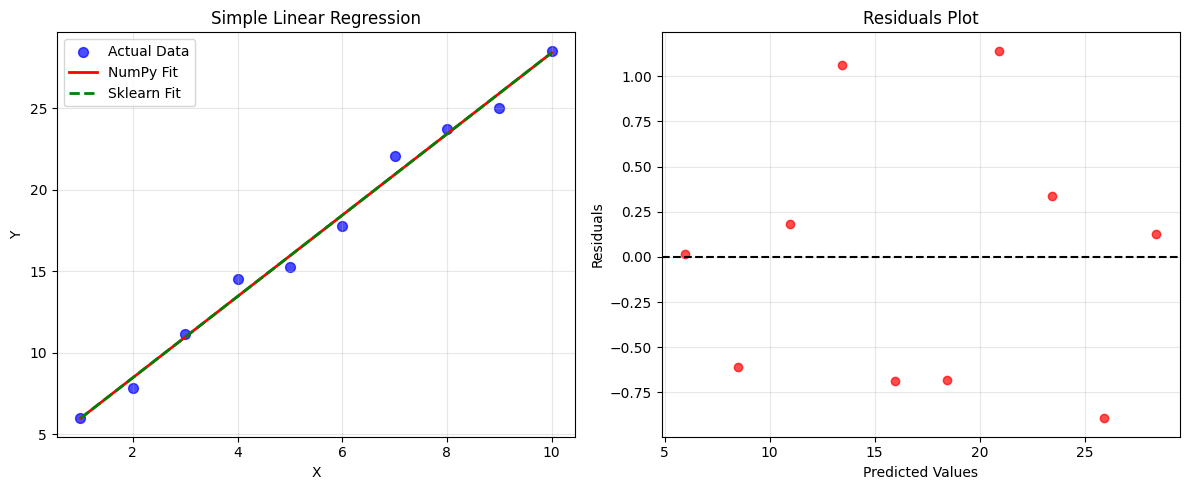

In [2]:
# =====================================
# PART 1: SIMPLE LINEAR REGRESSION
# =====================================

print("="*50)
print("PART 1: SIMPLE LINEAR REGRESSION")
print("="*50)

# Generate sample data for simple linear regression
np.random.seed(42)
x_simple = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_simple = 2.5 * x_simple + 3 + np.random.normal(0, 1, len(x_simple))  # y = 2.5x + 3 + noise

print("Sample Data:")
print("X values:", x_simple)
print("Y values:", np.round(y_simple, 2))

# Method 1: Using NumPy's least squares (Manual calculation)
print("\n--- Method 1: NumPy Least Squares ---")

# Create design matrix A = [x, 1] for y = mx + c
A = np.vstack([x_simple, np.ones(len(x_simple))]).T
print("Design Matrix A shape:", A.shape)

# Solve normal equation: A^T * A * theta = A^T * y
coefficients = np.linalg.lstsq(A, y_simple, rcond=None)[0]
slope_np, intercept_np = coefficients

print(f"Slope (m): {slope_np:.4f}")
print(f"Intercept (c): {intercept_np:.4f}")
print(f"Equation: y = {slope_np:.4f}x + {intercept_np:.4f}")

# Method 2: Using scikit-learn
print("\n--- Method 2: Scikit-learn ---")
model_simple = LinearRegression()
X_simple_reshaped = x_simple.reshape(-1, 1)
model_simple.fit(X_simple_reshaped, y_simple)

slope_sklearn = model_simple.coef_[0]
intercept_sklearn = model_simple.intercept_

print(f"Slope (m): {slope_sklearn:.4f}")
print(f"Intercept (c): {intercept_sklearn:.4f}")
print(f"Equation: y = {slope_sklearn:.4f}x + {intercept_sklearn:.4f}")

# Make predictions
y_pred_simple = model_simple.predict(X_simple_reshaped)

# Calculate metrics
mse_simple = mean_squared_error(y_simple, y_pred_simple)
r2_simple = r2_score(y_simple, y_pred_simple)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse_simple:.4f}")
print(f"R² Score: {r2_simple:.4f}")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_simple, y_simple, color='blue', alpha=0.7, label='Actual Data', s=50)
plt.plot(x_simple, slope_np * x_simple + intercept_np, 'r-', linewidth=2, label='NumPy Fit')
plt.plot(x_simple, y_pred_simple, 'g--', linewidth=2, label='Sklearn Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_simple - y_pred_simple
plt.scatter(y_pred_simple, residuals, color='red', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 2. Polynomial Regression
**Objective:** Fit a polynomial curve to data points that have non-linear relationships.

**Mathematical Formula:**
- $y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon$
- Transform features: $X = [1, x, x^2, x^3, ..., x^n]$

PART 2: POLYNOMIAL REGRESSION
Sample Data for Polynomial Regression:
X values: [-3.   -2.68 -2.37 -2.05 -1.74 -1.42 -1.11 -0.79 -0.47 -0.16  0.16  0.47
  0.79  1.11  1.42  1.74  2.05  2.37  2.68  3.  ]
Y values: [-33.   -25.9  -18.58 -12.28  -9.62  -6.13  -1.64  -0.51  -0.45   1.33
   0.65   0.61   1.03  -1.58  -1.91  -1.24  -2.06  -0.89  -1.96  -1.91]

--- Polynomial Degree 1 ---
Original features shape: (20, 1)
Transformed features shape: (20, 2)
Feature names: ['1' 'x']
Coefficients: [0.     3.6589]
Intercept: -5.8029
MSE: 42.6082
R² Score: 0.5102

--- Polynomial Degree 2 ---
Original features shape: (20, 1)
Transformed features shape: (20, 3)
Feature names: ['1' 'x' 'x^2']
Coefficients: [ 0.      3.6589 -2.0184]
Intercept: 0.8898
MSE: 7.0437
R² Score: 0.9190

--- Polynomial Degree 3 ---
Original features shape: (20, 1)
Transformed features shape: (20, 4)
Feature names: ['1' 'x' 'x^2' 'x^3']
Coefficients: [ 0.      0.4046 -2.0184  0.5471]
Intercept: 0.8898
MSE: 0.4945
R² Score: 0.99

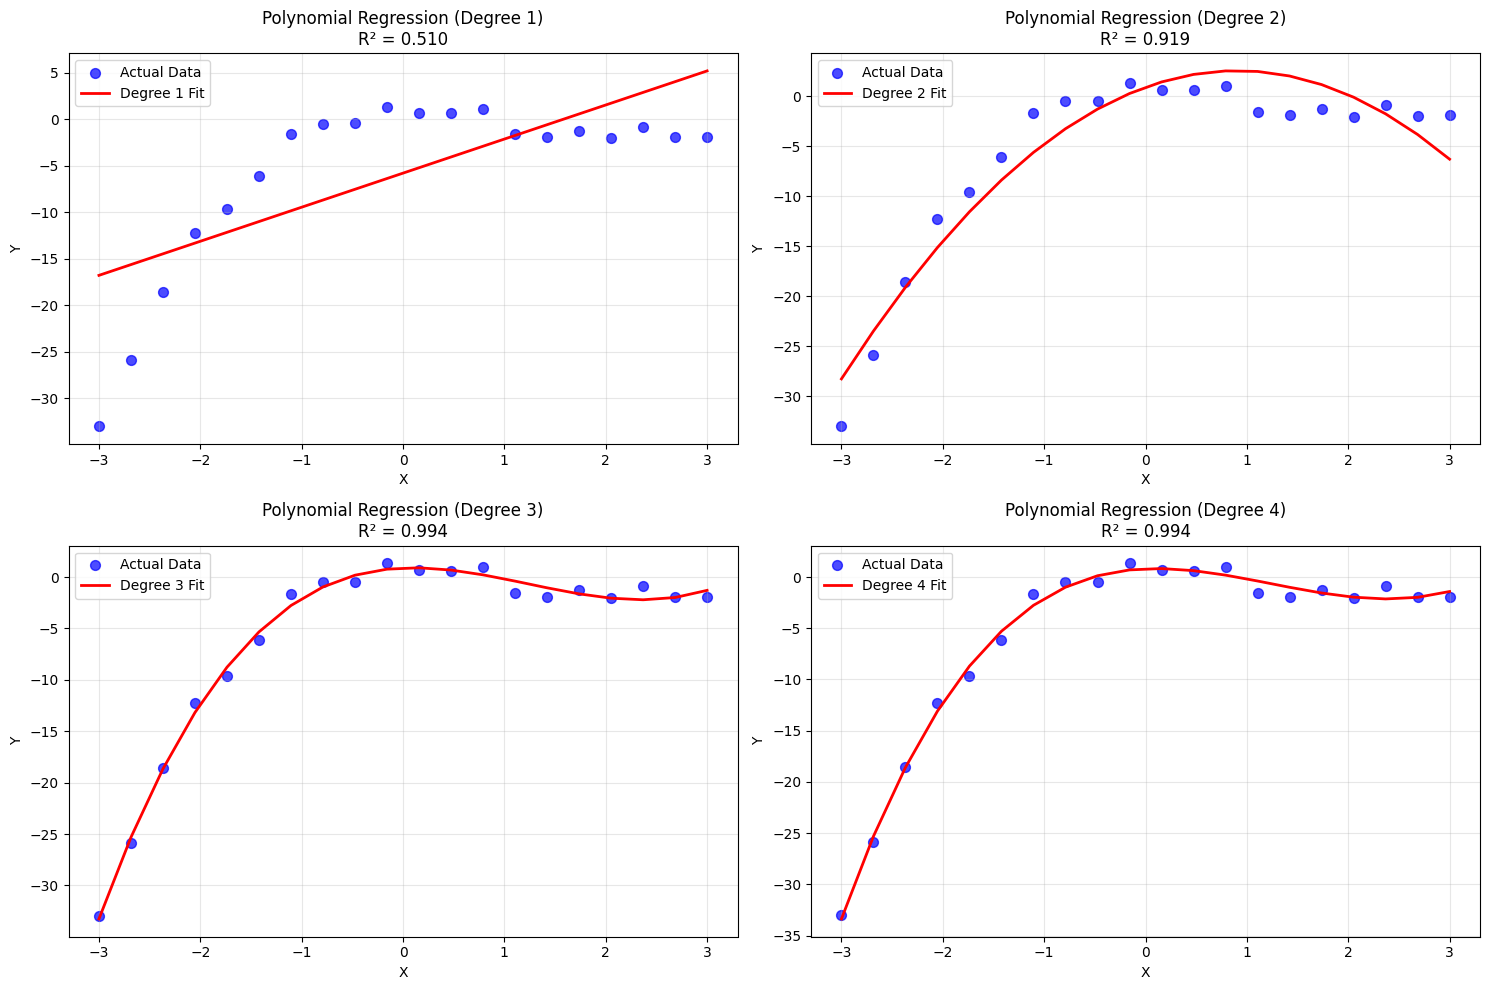


POLYNOMIAL REGRESSION COMPARISON
Degree	MSE		R² Score
------------------------------
1	42.6082		0.5102
2	7.0437		0.9190
3	0.4945		0.9943
4	0.4900		0.9944

Best polynomial degree: 4 (lowest MSE: 0.4900)
Prediction for x=1.5 using degree 4: -1.1465


In [3]:
# =====================================
# PART 2: POLYNOMIAL REGRESSION
# =====================================

print("="*50)
print("PART 2: POLYNOMIAL REGRESSION")
print("="*50)

# Generate sample data with polynomial relationship
np.random.seed(42)
x_poly = np.linspace(-3, 3, 20)
y_poly = 0.5 * x_poly**3 - 2 * x_poly**2 + x_poly + 1 + np.random.normal(0, 1, len(x_poly))

print("Sample Data for Polynomial Regression:")
print("X values:", np.round(x_poly, 2))
print("Y values:", np.round(y_poly, 2))

# Try different polynomial degrees
degrees = [1, 2, 3, 4]
models_poly = {}
predictions_poly = {}
scores_poly = {}

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    print(f"\n--- Polynomial Degree {degree} ---")
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_transformed = poly_features.fit_transform(x_poly.reshape(-1, 1))
    
    print(f"Original features shape: {x_poly.reshape(-1, 1).shape}")
    print(f"Transformed features shape: {X_poly_transformed.shape}")
    print(f"Feature names: {poly_features.get_feature_names_out(['x'])}")
    
    # Fit model
    model_poly = LinearRegression()
    model_poly.fit(X_poly_transformed, y_poly)
    
    # Store model
    models_poly[degree] = (model_poly, poly_features)
    
    # Make predictions
    y_pred_poly = model_poly.predict(X_poly_transformed)
    predictions_poly[degree] = y_pred_poly
    
    # Calculate metrics
    mse_poly = mean_squared_error(y_poly, y_pred_poly)
    r2_poly = r2_score(y_poly, y_pred_poly)
    scores_poly[degree] = (mse_poly, r2_poly)
    
    print(f"Coefficients: {np.round(model_poly.coef_, 4)}")
    print(f"Intercept: {model_poly.intercept_:.4f}")
    print(f"MSE: {mse_poly:.4f}")
    print(f"R² Score: {r2_poly:.4f}")
    
    # Plot
    plt.subplot(2, 2, i+1)
    
    # Sort for smooth curve plotting
    sort_idx = np.argsort(x_poly)
    x_sorted = x_poly[sort_idx]
    y_pred_sorted = y_pred_poly[sort_idx]
    
    plt.scatter(x_poly, y_poly, color='blue', alpha=0.7, label='Actual Data', s=50)
    plt.plot(x_sorted, y_pred_sorted, 'r-', linewidth=2, label=f'Degree {degree} Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polynomial Regression (Degree {degree})\nR² = {r2_poly:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare all models
print("\n" + "="*50)
print("POLYNOMIAL REGRESSION COMPARISON")
print("="*50)
print("Degree\tMSE\t\tR² Score")
print("-" * 30)
for degree in degrees:
    mse, r2 = scores_poly[degree]
    print(f"{degree}\t{mse:.4f}\t\t{r2:.4f}")

# Find best degree
best_degree = min(scores_poly.keys(), key=lambda x: scores_poly[x][0])
print(f"\nBest polynomial degree: {best_degree} (lowest MSE: {scores_poly[best_degree][0]:.4f})")

# Example: Making prediction with best model
best_model, best_poly_features = models_poly[best_degree]
new_x = np.array([[1.5]])
new_x_transformed = best_poly_features.transform(new_x)
prediction = best_model.predict(new_x_transformed)
print(f"Prediction for x=1.5 using degree {best_degree}: {prediction[0]:.4f}")

---
## 3. Multiple Linear Regression
**Objective:** Fit a linear model with multiple independent variables.

**Mathematical Formula:**
- $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$
- Matrix form: $Y = X\beta + \epsilon$
- Normal equation: $\beta = (X^TX)^{-1}X^TY$

PART 3: MULTIPLE LINEAR REGRESSION
Dataset Information:
Number of samples: 100
Number of features: 3
Feature names: ['Square_Footage', 'Bedrooms', 'Age']

First 10 rows of data:
   Square_Footage  Bedrooms    Age   Price
0         2248.36         2   6.46  289.74
1         1930.87         4  47.70  258.76
2         2323.84         4  30.31  296.62
3         2761.51         2  11.43  333.89
4         1882.92         2  33.59  233.77
5         1882.93         3  30.91  249.33
6         2789.61         5  17.91  372.19
7         2383.72         5   5.68  344.64
8         1765.26         3  33.58  250.29
9         2271.28         2  26.02  290.66

Basic Statistics:
       Square_Footage  Bedrooms     Age   Price
count          100.00    100.00  100.00  100.00
mean          1948.08      3.09   22.32  264.13
std            454.08      2.09   13.74   52.74
min            690.13      0.00    0.73  141.24
25%           1699.55      1.00    9.52  232.96
50%           1936.52      3.00   22.66  2

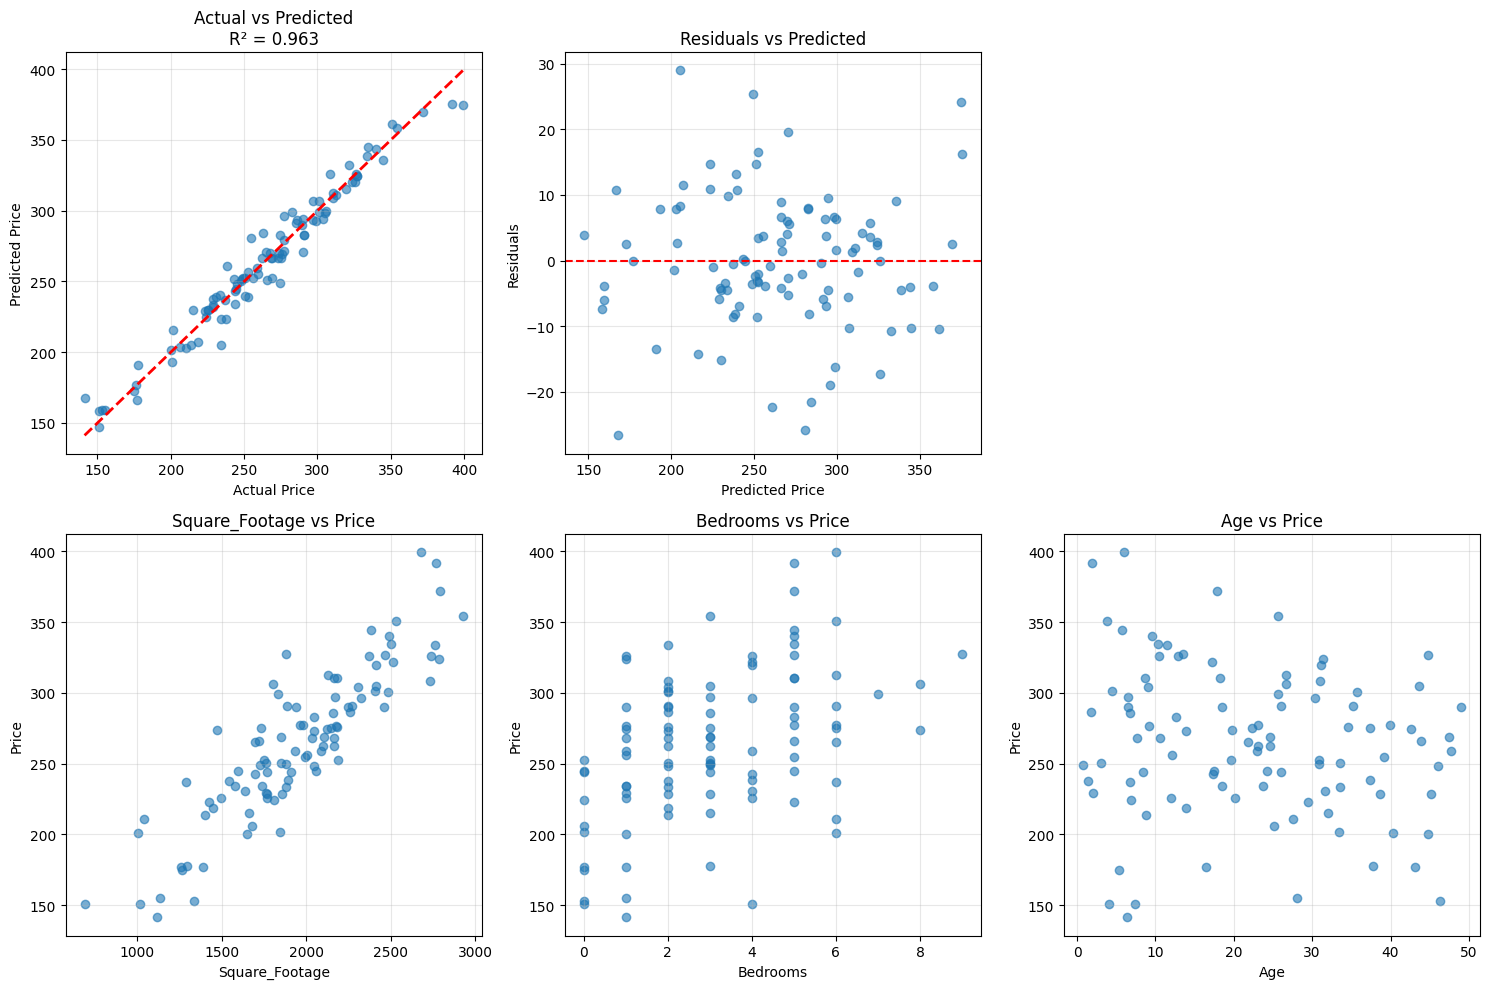


EXAMPLE PREDICTIONS
Example Houses:
House 1: 2500 sqft, 4 bedrooms, 5 years old
  Predicted Price: $336.78k

House 2: 1500 sqft, 2 bedrooms, 25 years old
  Predicted Price: $207.02k

House 3: 2000 sqft, 3 bedrooms, 10 years old
  Predicted Price: $274.35k

Final Multiple Linear Regression Equation:
Price = 49.91 +0.0988*Square_Footage +10.5551*Bedrooms -0.4902*Age


In [4]:
# =====================================
# PART 3: MULTIPLE LINEAR REGRESSION
# =====================================

print("="*50)
print("PART 3: MULTIPLE LINEAR REGRESSION")
print("="*50)

# Generate sample data with multiple features
np.random.seed(42)
n_samples = 100

# Features: Square footage, Number of bedrooms, Age of house
square_footage = np.random.normal(2000, 500, n_samples)
bedrooms = np.random.poisson(3, n_samples)
age = np.random.uniform(0, 50, n_samples)

# Target: House price (in thousands)
# Price depends on: +100 per sqft, +10k per bedroom, -500 per year age
house_price = (100 * square_footage/1000 + 10 * bedrooms - 0.5 * age + 50 + 
               np.random.normal(0, 10, n_samples))

# Create feature matrix
X_multiple = np.column_stack([square_footage, bedrooms, age])
y_multiple = house_price

print("Dataset Information:")
print(f"Number of samples: {n_samples}")
print(f"Number of features: {X_multiple.shape[1]}")
print(f"Feature names: ['Square_Footage', 'Bedrooms', 'Age']")

# Create DataFrame for better visualization
df = pd.DataFrame({
    'Square_Footage': square_footage,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': house_price
})

print("\nFirst 10 rows of data:")
print(df.head(10).round(2))

print("\nBasic Statistics:")
print(df.describe().round(2))

# Method 1: Using NumPy (Manual Implementation)
print("\n--- Method 1: NumPy Implementation ---")

# Add bias column (intercept)
X_with_bias = np.column_stack([np.ones(n_samples), X_multiple])
print(f"Design matrix shape: {X_with_bias.shape}")

# Normal equation: β = (X^T X)^(-1) X^T y
XtX = np.dot(X_with_bias.T, X_with_bias)
Xty = np.dot(X_with_bias.T, y_multiple)
beta_np = np.linalg.solve(XtX, Xty)

print("Coefficients (NumPy):")
print(f"Intercept: {beta_np[0]:.4f}")
print(f"Square_Footage coefficient: {beta_np[1]:.4f}")
print(f"Bedrooms coefficient: {beta_np[2]:.4f}")
print(f"Age coefficient: {beta_np[3]:.4f}")

# Method 2: Using scikit-learn
print("\n--- Method 2: Scikit-learn Implementation ---")

model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y_multiple)

print("Coefficients (Scikit-learn):")
print(f"Intercept: {model_multiple.intercept_:.4f}")
for i, feature in enumerate(['Square_Footage', 'Bedrooms', 'Age']):
    print(f"{feature} coefficient: {model_multiple.coef_[i]:.4f}")

# Make predictions
y_pred_multiple = model_multiple.predict(X_multiple)

# Calculate metrics
mse_multiple = mean_squared_error(y_multiple, y_pred_multiple)
r2_multiple = r2_score(y_multiple, y_pred_multiple)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse_multiple:.4f}")
print(f"R² Score: {r2_multiple:.4f}")

# Feature importance analysis
feature_importance = np.abs(model_multiple.coef_)
feature_names = ['Square_Footage', 'Bedrooms', 'Age']

print(f"\nFeature Importance (Absolute Coefficients):")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")

# Visualization
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted
plt.subplot(2, 3, 1)
plt.scatter(y_multiple, y_pred_multiple, alpha=0.6)
plt.plot([y_multiple.min(), y_multiple.max()], [y_multiple.min(), y_multiple.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted\nR² = {r2_multiple:.3f}')
plt.grid(True, alpha=0.3)

# 2. Residuals vs Predicted
plt.subplot(2, 3, 2)
residuals_multiple = y_multiple - y_pred_multiple
plt.scatter(y_pred_multiple, residuals_multiple, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True, alpha=0.3)

# 3. Feature correlation with target
for i, feature in enumerate(feature_names):
    plt.subplot(2, 3, i+4)
    plt.scatter(X_multiple[:, i], y_multiple, alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example predictions
print("\n" + "="*50)
print("EXAMPLE PREDICTIONS")
print("="*50)

example_houses = np.array([
    [2500, 4, 5],    # Large, new house
    [1500, 2, 25],   # Small, older house
    [2000, 3, 10]    # Medium house
])

example_predictions = model_multiple.predict(example_houses)

print("Example Houses:")
for i, (house, price) in enumerate(zip(example_houses, example_predictions)):
    print(f"House {i+1}: {house[0]:.0f} sqft, {house[1]:.0f} bedrooms, {house[2]:.0f} years old")
    print(f"  Predicted Price: ${price:.2f}k")
    print()

# Model equation
print("Final Multiple Linear Regression Equation:")
equation = f"Price = {model_multiple.intercept_:.2f}"
for i, coef in enumerate(model_multiple.coef_):
    sign = "+" if coef >= 0 else ""
    equation += f" {sign}{coef:.4f}*{feature_names[i]}"
print(equation)

---
## Summary & Conclusions

### Key Differences Between the Three Methods:

1. **Simple Linear Regression**
   - One independent variable (x) → One dependent variable (y)
   - Equation: y = mx + c
   - Best for linear relationships

2. **Polynomial Regression**
   - One independent variable with polynomial features
   - Equation: y = β₀ + β₁x + β₂x² + ... + βₙxⁿ
   - Best for non-linear curved relationships

3. **Multiple Linear Regression**
   - Multiple independent variables
   - Equation: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
   - Best when outcome depends on several factors

### When to Use Each Method:
- **Simple**: When you have clear linear relationship between two variables
- **Polynomial**: When relationship is curved/non-linear but with single predictor
- **Multiple**: When outcome is influenced by several different factors